# Алгоритмы интеллектуальной обработки больших объемов данных
## Котелевский Никита

## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [116]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
# import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [117]:
N = 25  # put your index here

In [118]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [119]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial.distance import cdist


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """

    def __init__(self, k, linkage):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        self.linkage = linkage
        if self.linkage == 'single':
            self.dist = self.single
        elif self.linkage == 'complete':
            self.dist = self.complete
        else:
            self.dist = self.average
        return

    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(x)
        self.X = x
        dist_matrix = cdist(self.X, self.X)
        for i in range(self.x_len):
            dist_matrix[i, i] = np.nan
        self.dist_matrix = dist_matrix
        return self

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        C = self.x_len
        C_n = [[i] for i in np.arange(C)]
        dist_matrix = self.dist_matrix

        while C > self.k:
            min_dist = 99999999999
            Ca = Cb = None
            for i in range(C):
                for j in range(i + 1, C):
                    dist = self.dist(C_n[i], C_n[j])
                    if dist < min_dist:
                        Ca = C_n[i]
                        Cb = C_n[j]
                        min_dist = dist
            C_n.remove(Ca)
            C_n.remove(Cb)
            C_n.append(Ca + Cb)
            C = C - 1
        self.C = C_n
        pred = np.empty(self.x_len, dtype=int)
        for k, x in enumerate(self.C):
            pred[x] = k
        return pred

    def single(self, a, b):
        return np.min(self.dist_matrix[a].T[b])

    def complete(self, a, b):
        return np.max(self.dist_matrix[a].T[b])

    def average(self, a, b):
        return np.sum(self.dist_matrix[a].T[b]) / (len(a) * len(b))

    def get_clusters(self):
        return self.C

    def get_dist(self):
        return self.dist_matrix

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)


Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

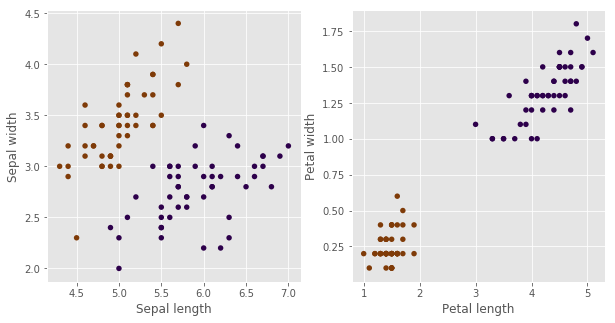

In [120]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [121]:
%%time
pred_iris = Clustering(k=2, linkage='single').fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)


Adjusted Rand index for iris is: 1.00
CPU times: user 3.16 s, sys: 8 ms, total: 3.17 s
Wall time: 3.18 s


In [122]:
%%time
pred_iris = sc.AgglomerativeClustering().fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00
CPU times: user 6.58 ms, sys: 14 µs, total: 6.59 ms
Wall time: 13.8 ms


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [123]:
## Задание 2
def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    m = []
    cl = np.unique(y)
    for i in cl:
        d = np.max(cdist(x[y == i], x[y == i]))
        m.append(d)
    m = np.array(m)
    q = np.mean(m)
    return q

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

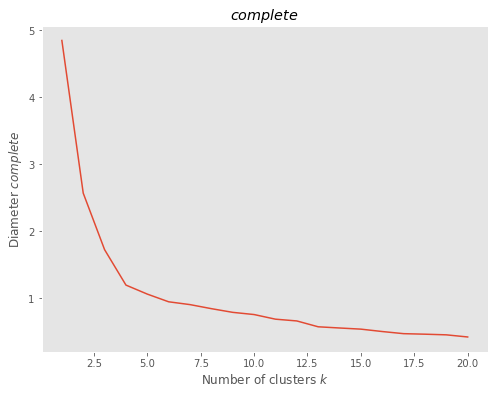

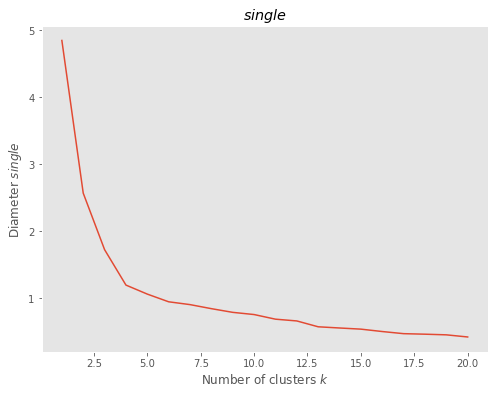

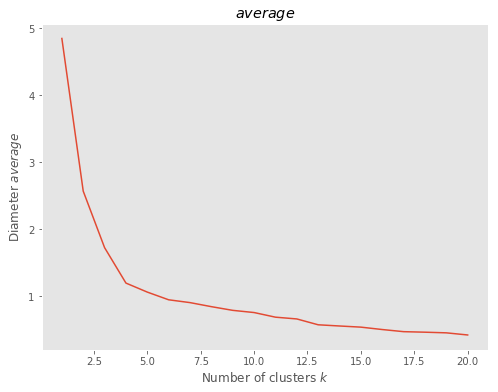

In [124]:
ks = range(1, 21)
criteria = np.zeros(len(ks))
l = ['complete', 'single', 'average']

for dt in l:
    for i, k in enumerate(ks):
        y = Clustering(k=k, linkage=l).fit_predict(x_iris)
        criteria[i] = quality(x_iris, y)

    pl.figure(figsize=(8, 6))
    pl.plot(ks, criteria)
    pl.title("$" + dt + "$")
    pl.ylabel("Diameter " + "$" + dt + "$")
    pl.xlabel("Number of clusters $k$")
    pl.grid()
    pl.show()

# Диаметр

При увеличении числа кластеров уменьшается диаметр каждого из них, что кажется естественным. Выбирать следует такое k, после которого уменьшение размера диаметров становится незначительным. В данном случае, это что-то порядка k=4

In [125]:
## Задание 3
import pandas as pd

df = pd.read_csv("WDIData.csv")

In [126]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [147]:
df1 = df[['Country Name', 'Indicator Code', '2008']]
df1 = df1.set_index(['Country Name', 'Indicator Code'])
df1.unstack()

2008                                   \
Indicator Code           AG.AGR.TRAC.NO AG.CON.FERT.PT.ZS AG.CON.FERT.ZS   
Country Name                                                               
Afghanistan                         NaN        151.977291       2.988068   
Albania                          7438.0               NaN      75.877049   
Algeria                        104529.0        283.956676       8.576713   
American Samoa                      NaN               NaN            NaN   
Andorra                           355.0               NaN            NaN   
Angola                              NaN               NaN       8.258824   
Antigua and Barbuda                 NaN               NaN       3.500000   
Arab World                          NaN         27.699933      64.878669   
Argentina                           NaN        305.880310      35.214968   
Armenia                             NaN               NaN      18.150533   
Aruba                               NaN               NaN            NaN   
Australia                           NaN        215.555870      42.604425   
Austria                             NaN               NaN     110.045289   
Azerbaijan                          NaN               NaN      20.937534   
Bahamas, The                        NaN               NaN            NaN   
Bahrain                             NaN          0.786687    1993.333333   
Bangladesh                          NaN        207.780972     200.064078   
Barbados                            NaN               NaN     135.153846   
Belarus                         49517.0         21.945454     237.418419   
Belgium                             NaN         19.730064     328.912322   
Belize                              NaN               NaN      49.757143   
Benin                               NaN               NaN       0.308077   
Bermuda                             NaN               NaN            NaN   
Bhutan                              NaN               NaN      11.660000   
Bolivia                             NaN               NaN       4.708861   
Bosnia and Herzegovina              NaN               NaN      11.871032   
Botswana                         3371.0               NaN            NaN   
Brazil                              NaN        309.008998     141.838605   
British Virgin Islands              NaN               NaN            NaN   
Brunei Darussalam                   NaN               NaN     112.666667   
...                                 ...               ...            ...   
Syrian Arab Republic                NaN        171.570072      87.989998   
Tajikistan                          NaN        493.383743      70.445344   
Tanzania                            NaN               NaN       4.676620   
Thailand                            NaN       1452.841606     130.517574   
Timor-Leste                         NaN               NaN            NaN   
Togo                              129.0               NaN       0.000427   
Tonga                               NaN               NaN      10.125000   
Trinidad and Tobago                 NaN          7.370774     868.000000   
Tunisia                         40438.0          8.985301      34.376367   
Turkey                              NaN        160.702136      71.972489   
Turkmenistan                        NaN               NaN            NaN   
Turks and Caicos Islands            NaN               NaN            NaN   
Tuvalu                              1.0               NaN            NaN   
Uganda                              NaN               NaN       2.942016   
Ukraine                        335473.0         40.026360      32.786845   
United Arab Emirates                NaN          7.597400     423.643411   
United Kingdom                      NaN        141.492989     208.159867   
United States                       NaN         78.692948     112.427320   
Upper middle income                 NaN         91.898296     156.681301   
Uruguay

In [148]:
df1 = df1.unstack()
df1 = (df1 - df1.mean()) / df1.std()
df1 = df1['2008']
df1 = df1.fillna(0)

In [149]:
df1  = df1[df1.columns[(df1 ** 2).sum() > 260]]
df1.head()

Indicator Code,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,EN.POP.DNST,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL.ZS,SP.URB.GROW,SP.URB.TOTL.IN.ZS
Country Name,,,,,,,,,,,,,,
Afghanistan,-0.295238,-0.296727,0.053989,-1.193286,-0.305787,-0.297615,-0.325623,-0.305915,-0.179954,0.572605,-0.282191,1.375333,0.849342,-1.375333
Albania,-0.336486,-0.336618,0.569616,0.723517,-0.318406,-0.298355,-0.331845,-0.310548,-0.140395,-1.341278,-0.310399,0.269698,-0.371050,-0.269698
Algeria,-0.181223,-0.186221,0.569616,0.700223,-0.311112,-0.197219,-0.323488,-0.299406,-0.196299,0.052531,-0.273424,-0.414017,0.254151,0.414017
American Samoa,-0.338279,-0.338443,0.000000,0.000000,-0.322225,-0.300130,-0.335237,-0.312790,-0.033564,-1.779984,-0.313748,-1.335288,-1.818411,1.335288
Andorra,-0.338262,-0.338426,0.569616,0.723517,-0.322232,-0.300130,-0.335327,-0.312790,-0.097766,-0.068043,-0.313717,-1.380625,-0.642999,1.380625


In [165]:
model = Clustering(k=7, linkage='complete')
mylabels = model.fit_predict(df1.values)

In [166]:
mydict = {}
for i, label in enumerate(set(mylabels)):
    mydict.update({label: i + 1})
for i in xrange(mylabels.shape[0]):
    mylabels[i] = mydict[mylabels[i]]

In [167]:
pd.options.mode.chained_assignment = None
df1.loc[:, 'label'] = mylabels

for label, group in df1.groupby('label'):
    print('Cluster #{}'.format(label))
    print(group.index.tolist())
    print('=' * 20)

Cluster #1
['World']
Cluster #2
['Macao SAR, China', 'Monaco']
Cluster #3
['IBRD only', 'IDA & IBRD total', 'Low & middle income', 'Middle income']
Cluster #4
['Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'High income', 'Late-demographic dividend', 'Lower middle income', 'OECD members', 'Post-demographic dividend', 'Upper middle income']
Cluster #5
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Djibouti', 'Eritrea', 'Ethiopia', 'Fragile and conflict affected situations', 'Gambia, The', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Heavily indebted poor countries (HIPC)', 'IDA only', 'IDA total', 'Kenya', 'Korea, Dem. People\xe2\x80\x99s Rep.', 'Least developed countries: UN classification', 'Lesotho', 'Liberia', 'Low income', 'Madagascar', 'Malawi', 'Mali', 'Mau

In [168]:
## Задание 4
from sklearn.manifold import TSNE

transform = TSNE(n_components=2)
embedded = transform.fit_transform(df1.values)

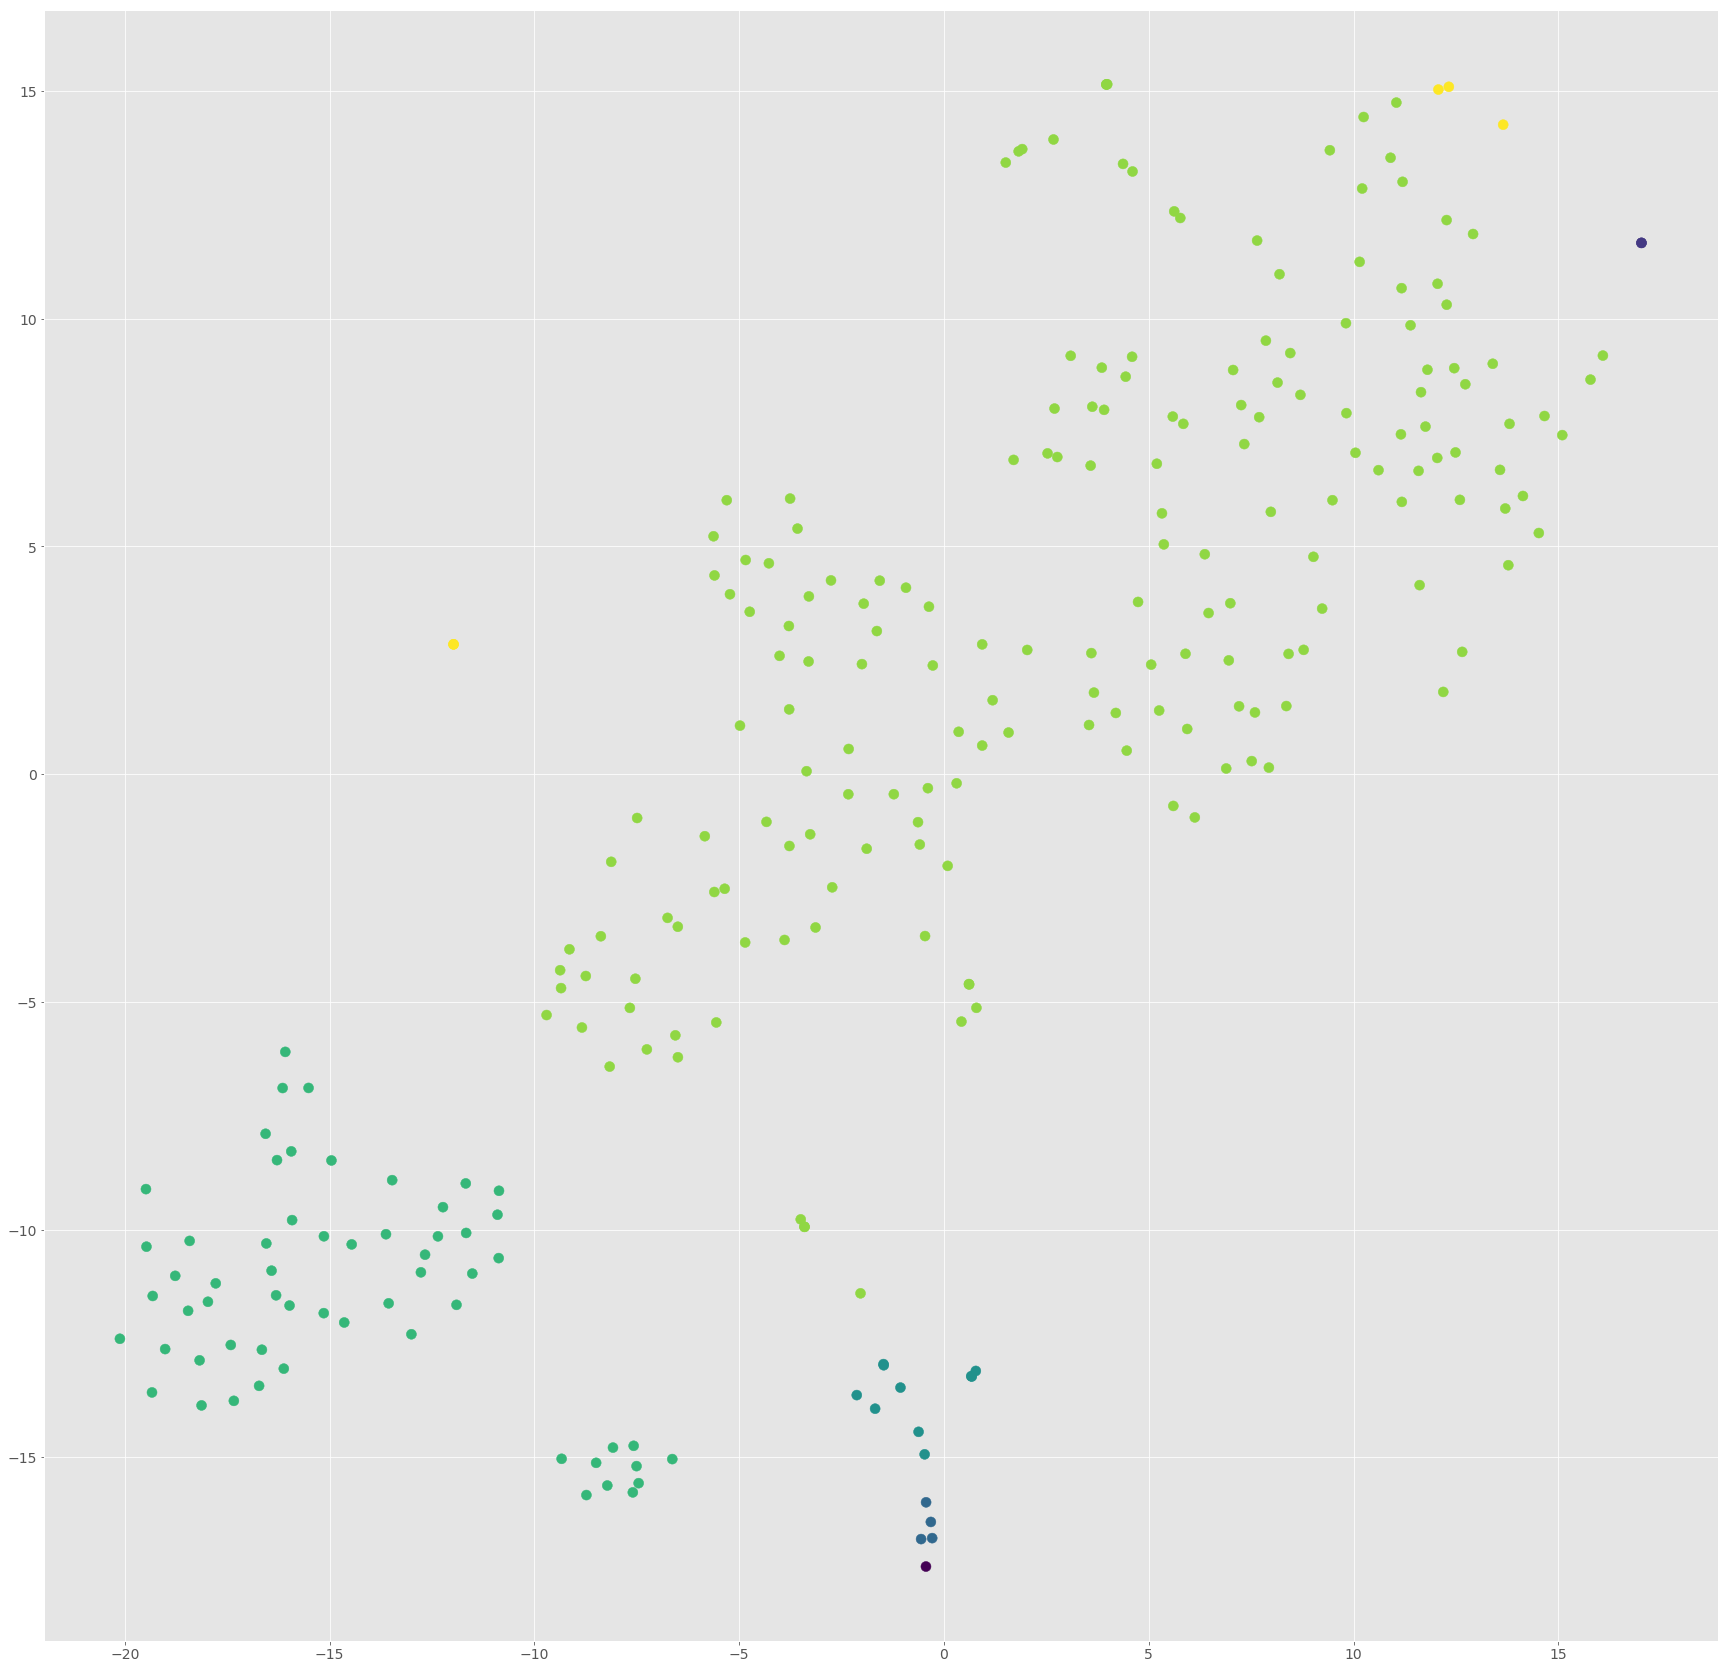

In [169]:
plt.figure(figsize=(30, 30))
matplotlib.rcParams.update({'font.size': 14})

plt.scatter(embedded[:, 0], embedded[:, 1], c=mylabels, s=100)
plt.show()

Довольно непросто было добиться хоть сколько нибудь значимого разбиения - при отсутсвии регулирования малозначимых признаков, все сливалось в один кластер. Сейчас при оставшихся 14 признаках и разбиении на 7 кластеров имеем следующие интерпретируемые группы:
7 - "нефтяные монархии" Персидского залива + Сингапур (либо выброс, либо он оказался там потому, что 2ая статья по импорту в Сингапуре - нефть)
6 - В основном широкий класс развитых стран
5 - В основном бедные, преимущественно африканские страны (но не только). Среди них же можно разглядеть "Low income", что хорошо характеризует этот кластер
4 - Какой-то очень размытый класс, с широким уровнем дохода. Наверное это правильно, ведь туда относятся как не очень богатые азиатские страны с огромным населением (соответственно большой дисперсией дохода), так и Австралия, у которой уровень жизни один из самых высоких в мире
3 - 1 - скорее всего никак не интерпретируются и являются выбросами

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.